# Proyecto Parcial 2

**Objetivo**: Se crean diferentes tipos de modelos de IA (Regresión logística, LDA, Random forest, Árbol de decisión, Bagging o Boosting) para predecir que personas abordo del Spaceship Titanic fueron transportadas por la anomalía espacio-temporal a otra dimensión. Para más información se puede consultar la siguiente liga: https://www.kaggle.com/competitions/spaceship-titanic 

## Importación de los datos
1. Se importan los datos de entrenamiento al ambiente de trabajo. 

In [53]:
import pandas as pd

# Se lee el archivo csv con los datos a un dataframe de pandas
train = pd.read_csv('spaceship-titanic/train.csv')

# Se verifica que los datos se hayan transportado correctamente.
print(train.dtypes)
print(train.info())
train.head(10)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


- Tipos de variables identificadas
  <table>
      <thead><tr>
          <td><strong>Variable</strong></td>
          <td><strong>Tipo</strong></td>
      </tr></thead>
      <tbody>
          <tr>
              <td>HomePlanet</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>CryoSleep</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>Cabin</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>Destination</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>Age</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>VIP</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>RoomService</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>FoodCourt</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>ShoppingMall</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>Spa</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>VRDeck</td>
              <td>Cuantitativa</td>
          </tr>
          <tr>
              <td>Name</td>
              <td>Cualitativa</td>
          </tr>
          <tr>
              <td>Transported</td>
              <td>Cualitativa</td>
          </tr>
      </tbody>
  </table>

- En la parte de comprobación de los datos, al momento de imprimir la info del dataframe, se tiene que la cantidad de registros no nulos en las diferentes columnas del dataframe es diferente en todas las columnas, esto significa que el dataframe tiene muchos huecos y es irregular, lo que puede causar problemas al momento de entrenar y/o implementar los diferentes modelos. Para poder llenar estos huecos, se llenaran los valores nulos en las diferentes columnas por la media de los datos existentes.

- Se eliminan las columnas que no son relevantes

In [55]:
train = train.drop(columns=['Name', 'Cabin', 'PassengerId'])

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB
None


In [57]:
import numpy as np

# Recorrer cada columna del dataframe para procesar y llenar los huecos (creado con ayuda de GPT)
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        train[col] = train[col].fillna(train[col].mean()) # Si es numerica, llenar con la media 
    else:
        clases = train[col].dropna().unique()
        if len(clases) > 10:
            # Si se detecta una columna que no es de clases como la de nombre, se llenan los huecos con el nombre desconocido
            train[col] = train[col].fillna('Desconocido') 
        else:
            n_nulls = train[col].isna().sum()
            if n_nulls > 0 and len(clases) > 0:
                # Si se detecta una columna que es de clases, se llenan los huecos con clases elegidas al azar.
                aleatorios = np.random.choice(clases, size=n_nulls, replace=True)
                train.loc[train[col].isna(), col] = aleatorios

# Imprimir nuevamente los datos
print(train.info())
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB
None


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.000000,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.000000,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.000000,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.000000,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.000000,True
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.000000,True
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.000000,True
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,304.854791,True
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.000000,True
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.000000,True


- Se verifican las cantidades de clases en cada una de las columnas.

In [59]:
for col in train.columns:
    if not pd.api.types.is_numeric_dtype(train[col]):
        clases = train[col].dropna().unique()
        if len(clases) > 20:
            print(f"La columna {col} tiene mas de 10 clases")
        else:
            print(f"{col}: {clases}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: [False True]
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: [False True]


- Se convierten las variables que son categóricas a dummies. 

In [61]:
for col in train.columns:
    if not pd.api.types.is_numeric_dtype(train[col]):
        clases = train[col].dropna().unique()
        if len(clases) <= 5:
            dummie = pd.get_dummies(train[col], drop_first=True, prefix=f"{col}_dummie")
            train = pd.concat([train, dummie], axis=1)
            train.drop(col, axis=1, inplace=True)

train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_dummie_Europa,HomePlanet_dummie_Mars,CryoSleep_dummie_True,Destination_dummie_PSO J318.5-22,Destination_dummie_TRAPPIST-1e,VIP_dummie_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False


- Se dividen los datos de entrenamiento en datos de entrenamiento y prueba para probar los diferentes modelos.

In [65]:
from sklearn.model_selection import train_test_split

# Dividir datos en proporcion 80/20
X_train_tr, X_test_tr, Y_train_tr, Y_test_tr = train_test_split(train.drop('Transported', axis=1), train['Transported'], train_size=0.8, random_state=42)

# Imprimir conteos
print("Datos originales: ", train['Transported'].value_counts())
print("Datos de entrenamiento: ", Y_train_tr.value_counts())
print("Datos de prueba: ", Y_test_tr.value_counts())

Datos originales:  Transported
True     4378
False    4315
Name: count, dtype: int64
Datos de entrenamiento:  Transported
True     3500
False    3454
Name: count, dtype: int64
Datos de prueba:  Transported
True     878
False    861
Name: count, dtype: int64


## Generación de modelos

2. Se genera un modelo de regresión logística multinomial evaluando la calidad del método usando la validación cruzada.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Escalar datos numericos
scaler = StandardScaler()
X_train_tr_scaled = scaler.fit_transform(X_train_tr)
X_test_tr_scaled = scaler.transform(X_test_tr)

# Declarar modelo normal ya que solo se tienen dos clases en la variable objetivo
model = LogisticRegression(penalty=None, class_weight="balanced")

# Evaluar la exactitud con validación cruzada con 10 folds
accuracy_scores = cross_val_score(model, X_train_tr_scaled, Y_train_tr, cv=10, scoring='accuracy')

# Imprimir puntajes
print("Puntajes de validacion cruzada (exactitud en cada fold): ", accuracy_scores)
print("Precision promedio en los datos de entrenamiento: ", accuracy_scores.mean())


Puntajes de validacion cruzada (exactitud en cada fold):  [0.77155172 0.78017241 0.77729885 0.80747126 0.79568345 0.77985612
 0.79136691 0.76402878 0.8        0.80143885]
Precision promedio en los datos de entrenamiento:  0.7868868353592988


- Se prueba el modelo y se generan las probabilidades para el conjunto de prueba con la finalidad de generar métricas que permitan evaluar la calidad del modelo, como la exactitud, precisión, recall, f1-score, curva_roc y matriz de confusión.

In [79]:
import matplotlib.pyplot as plt

# Entrenar el modelo con los datos de entrenamiento 
model.fit(X_train_tr_scaled, Y_train_tr)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_tr_scaled)

# Obtener probabilidades para las curvas ROC y AUC
y_prob = model.predict_proba(X_test_tr_scaled)[:, 1]

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(Y_test_tr, y_pred))

# Métricas de desempeño
print("Accuracy:", accuracy_score(Y_test_tr, y_pred))
print("Precision:", precision_score(Y_test_tr, y_pred))
print("Recall:", recall_score(Y_test_tr, y_pred))
print("F1 Score:", f1_score(Y_test_tr, y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test_tr, y_prob))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(Y_test_tr, y_pred))


Matriz de confusión:
[[637 224]
 [171 707]]
Accuracy: 0.772857964347326
Precision: 0.7593984962406015
Recall: 0.8052391799544419
F1 Score: 0.7816473189607518
ROC AUC Score: 0.8604677773103797

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       861
        True       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



- Se grafica la curva ROC

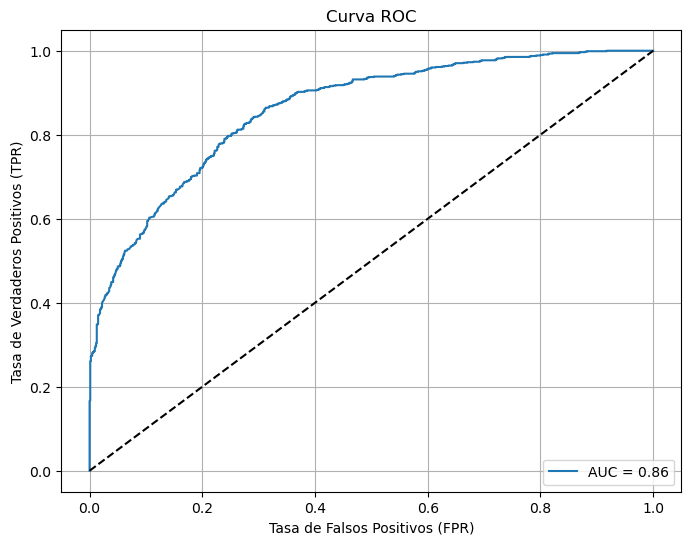

In [81]:
# Definir curva ROC
fpr, tpr, thresholds = roc_curve(Y_test_tr, y_prob)

# Graficar 
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(Y_test_tr, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

3. Se genera un modelo de LDA evaluando la calidad del método usando la validación cruzada, se comparan los resultados con la metodología anterior.

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Declarar modelo LDA
lda = LinearDiscriminantAnalysis() 

# Validación cruzada con 10 pliegues
lda_scores = cross_val_score(lda, X_train_tr_scaled, Y_train_tr, cv=10, scoring='accuracy')

# Imprimir los resultados
print("Puntajes de validacion cruzada (exactitud en cada fold): ", lda_scores)
print("Precision promedio en los datos de entrenamiento: ", lda_scores.mean())

Puntajes de validacion cruzada (exactitud en cada fold):  [0.72988506 0.75574713 0.75431034 0.79166667 0.76834532 0.75395683
 0.75539568 0.74244604 0.77841727 0.76978417]
Precision promedio en los datos de entrenamiento:  0.7599954519143306


- Se obtienen las probabilidades y se generan las métricas que permiten evaluar la calidad del modelo planteado. 

In [86]:
# Entrenar modelo
y_pred_lda = lda.fit(X_train_tr_scaled, Y_train_tr)

# Obtener probabilidades
y_prob_lda = y_pred_lda.predict_proba(X_test_tr_scaled)[:, 1] 

# Obtener predicciones
y_pred_lda_class = y_pred_lda.predict(X_test_tr_scaled)

# Evaluación de métricas
print("Matriz de confusión (LDA):")
print(confusion_matrix(Y_test_tr, y_pred_lda_class))

print("Accuracy:", accuracy_score(Y_test_tr, y_pred_lda_class))
print("Precision:", precision_score(Y_test_tr, y_pred_lda_class))
print("Recall:", recall_score(Y_test_tr, y_pred_lda_class))
print("F1 Score:", f1_score(Y_test_tr, y_pred_lda_class))
print("ROC AUC Score:", roc_auc_score(Y_test_tr, y_prob_lda))

print("\nReporte de clasificación:")
print(classification_report(Y_test_tr, y_pred_lda_class))

Matriz de confusión (LDA):
[[676 185]
 [255 623]]
Accuracy: 0.7469810235767682
Precision: 0.7710396039603961
Recall: 0.7095671981776766
F1 Score: 0.7390272835112692
ROC AUC Score: 0.8464418658179422

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.73      0.79      0.75       861
        True       0.77      0.71      0.74       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



- Se grafica la curva ROC para el modelo LDA.

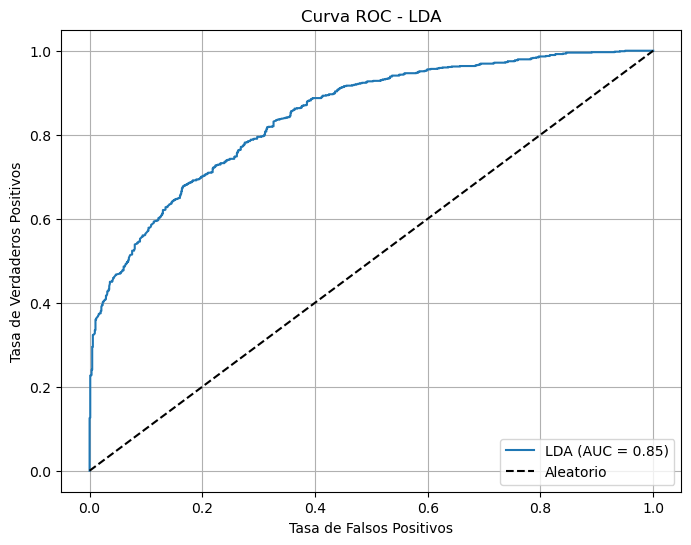

In [91]:
fpr, tpr, _ = roc_curve(Y_test_tr, y_prob_lda)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"LDA (AUC = {roc_auc_score(Y_test_tr, y_prob_lda):.2f})")
plt.plot([0,1], [0,1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - LDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()

4. Se genera un modelo de árbol de decisión evaluando la calidad del modelo usando la validación cruzada, se comparan los resultados con la metodología anterior. 

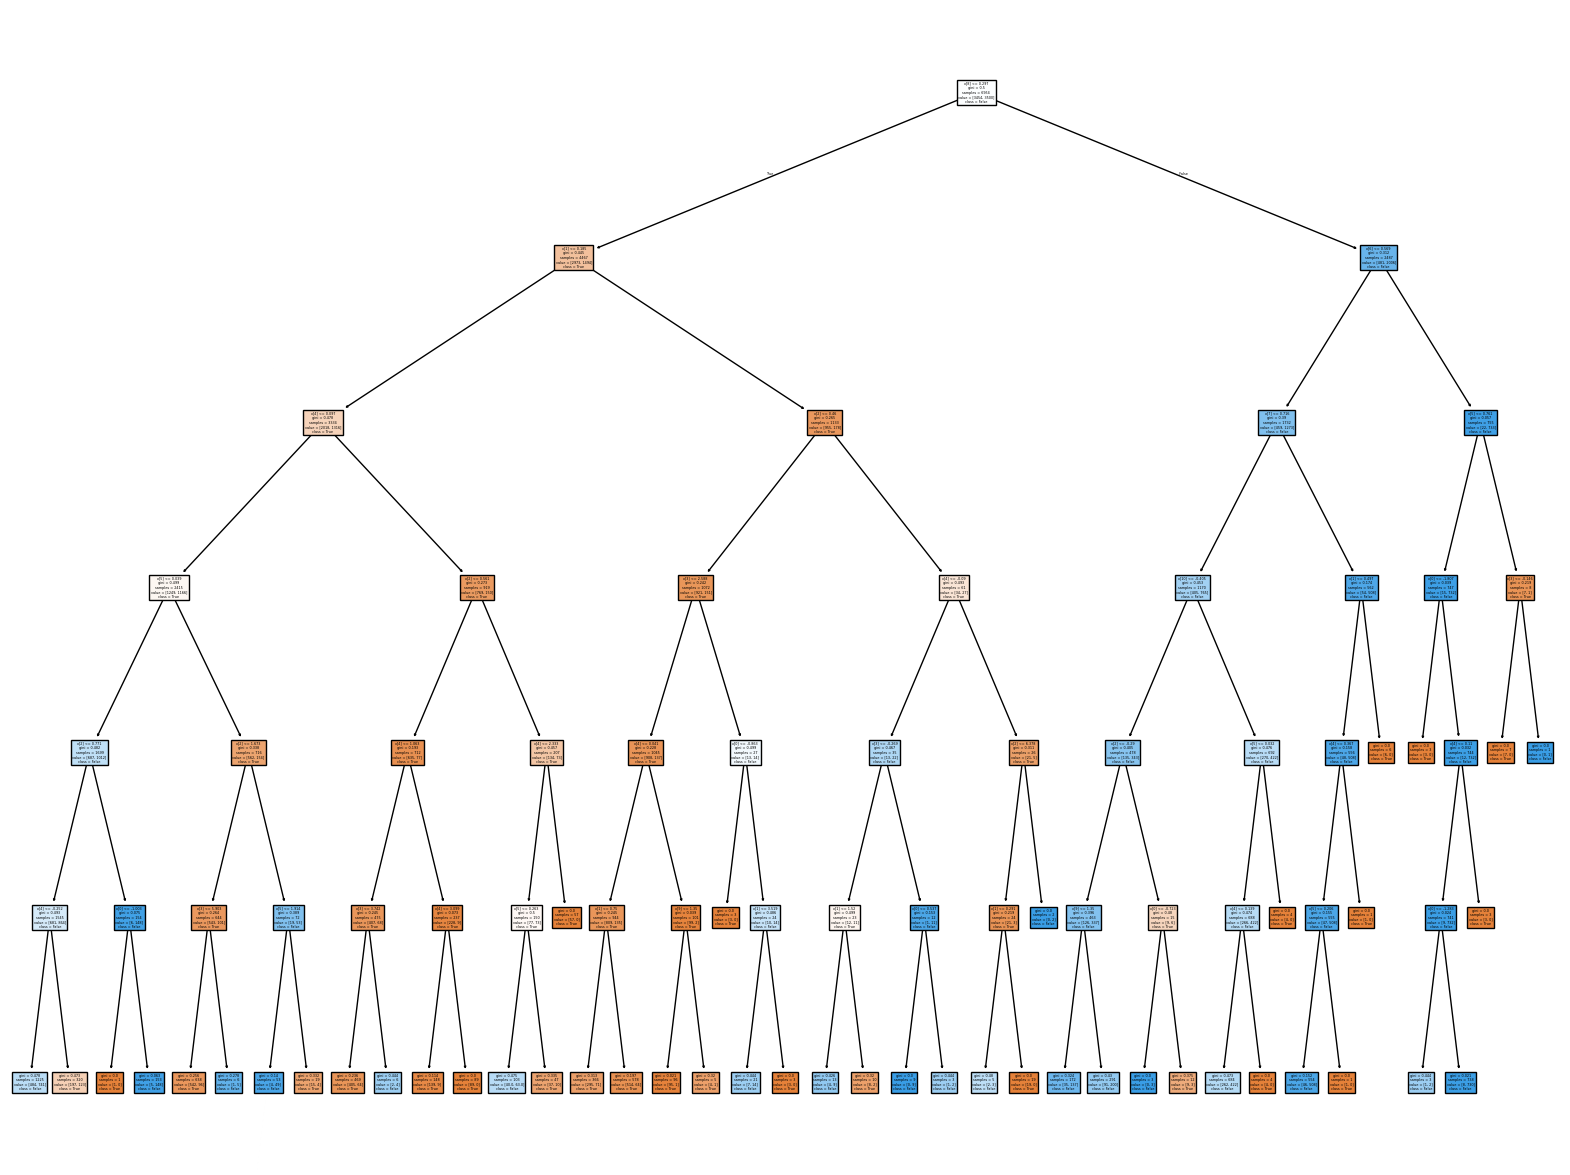

In [147]:
from sklearn.tree import plot_tree, DecisionTreeClassifier as DTC

# Declarar modelo DTC para crear un árbol de decisión y entrenarlo
tree = DTC(max_depth=6).fit(X_train_tr_scaled, Y_train_tr)

# Se grafica el árbol completo para visualizarlo
plt.figure(figsize=(20,15))
plot_tree(tree, class_names=["True", "False"], filled=True)
plt.show()

- Se realiza la predicción y se calculan las métricas de desempeño que permiten evaluar la calidad del modelo. 

In [149]:
# Se hace la predicción
y_pred_tree = tree.predict(X_test_tr_scaled)

# Se imprime el reporte inicial
print(confusion_matrix(Y_test_tr, y_pred_tree))
print(classification_report(Y_test_tr, y_pred_tree))

[[585 276]
 [123 755]]
              precision    recall  f1-score   support

       False       0.83      0.68      0.75       861
        True       0.73      0.86      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



- Se poda el árbol usando K-Fold, se vuelve a entrenar y a graficar

Mejor valor de alpha:  0.0007403241710834462


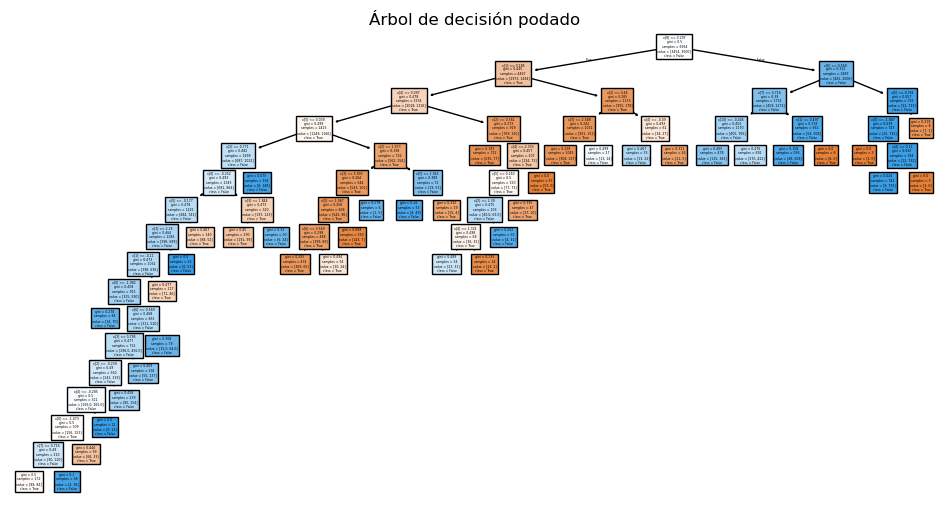

In [151]:
import numpy as np

# Obtener alphas candidatos 
path = DTC().cost_complexity_pruning_path(X_train_tr_scaled, Y_train_tr)
alphas = path.ccp_alphas[:-1]
alphas = alphas[alphas >= 0]

# Selección de alpha usando K-Fold
scores = [np.mean(cross_val_score(DTC(ccp_alpha = a), X_train_tr_scaled, Y_train_tr, cv=10)) for a in alphas]
best_alpha = alphas[np.argmax(scores)]

# Entrenar el nuevo árbol
pruned_tree = DTC(ccp_alpha = best_alpha)
pruned_tree.fit(X_train_tr_scaled, Y_train_tr)
print("Mejor valor de alpha: ", best_alpha)

# Se grafica el árbol podado
plt.figure(figsize=(12,6))
plot_tree(pruned_tree, class_names=["True", "False"], filled=True)
plt.title("Árbol de decisión podado")
plt.show()

- Se realiza la predicción y se calculan las métricas de desempeño que permiten evaluar la calidad del modelo del nuevo árbol.

In [153]:
# Se hace la predicción
y_pred_tree_pruned = pruned_tree.predict(X_test_tr_scaled)

# Se imprime el reporte inicial
print(confusion_matrix(Y_test_tr, y_pred_tree_pruned))
print(classification_report(Y_test_tr, y_pred_tree_pruned))

[[644 217]
 [169 709]]
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



5. Se genera un modelo de Random Forest evaluando la calidad del modelo usando la validación cruzada, se comparan los resultados con la metodología anterior.

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Declarar modelo RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Validación cruzada con 15 folds
rf_scores = cross_val_score(rf, X_train_tr_scaled, Y_train_tr, cv=15, scoring='accuracy')

# Imprimir los resultados
print("Puntajes de validacion cruzada (exactitud en cada fold): ", rf_scores)
print("Precision promedio en los datos de entrenamiento: ", rf_scores.mean())

Puntajes de validacion cruzada (exactitud en cada fold):  [0.7887931  0.79525862 0.76508621 0.76939655 0.79741379 0.80603448
 0.79956897 0.7737069  0.75862069 0.77969762 0.79265659 0.78401728
 0.80345572 0.77969762 0.77321814]
Precision promedio en los datos de entrenamiento:  0.7844414860604255


- Evaluar calidad del modelo

In [118]:
# Entrenar el modelo
rf.fit(X_train_tr_scaled, Y_train_tr)

# Hacer predicciones
y_pred_rf = rf.predict(X_test_tr_scaled)
y_prob_rf = rf.predict_proba(X_test_tr_scaled)[:, 1]  # Probabilidad clase positiva

# Métricas
print("Matriz de confusión:")
print(confusion_matrix(Y_test_tr, y_pred_rf))

print("Accuracy:", accuracy_score(Y_test_tr, y_pred_rf))
print("Precision:", precision_score(Y_test_tr, y_pred_rf))
print("Recall:", recall_score(Y_test_tr, y_pred_rf))
print("F1 Score:", f1_score(Y_test_tr, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(Y_test_tr, y_prob_rf))

print("\nReporte de clasificación:")
print(classification_report(Y_test_tr, y_pred_rf))

Matriz de confusión:
[[654 207]
 [198 680]]
Accuracy: 0.7671075330649799
Precision: 0.7666290868094702
Recall: 0.7744874715261959
F1 Score: 0.7705382436260623
ROC AUC Score: 0.8455277938721463

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.77      0.76      0.76       861
        True       0.77      0.77      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



- Graficar curva ROC

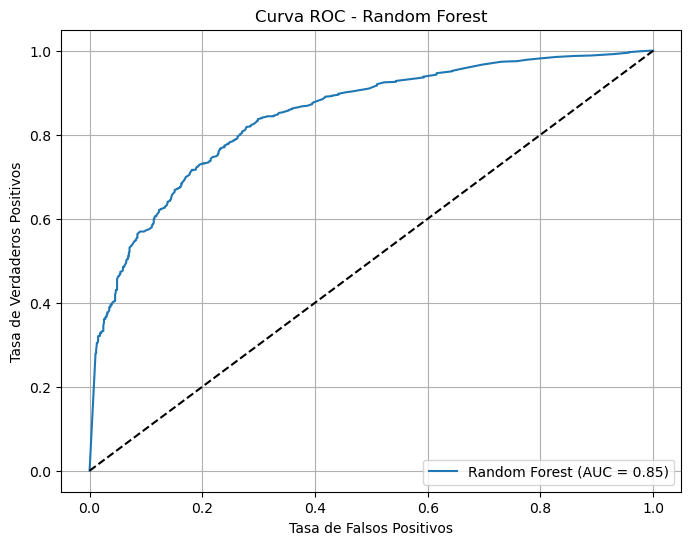

In [123]:
# Generar curva ROC
fpr, tpr, _ = roc_curve(Y_test_tr, y_prob_rf)

# Graficar curva
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(Y_test_tr, y_prob_rf):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Selección de mejor modelo y predicción

A continuación, se presenta un resumen de los modelos obtenidos:
<table>
    <thead><tr>
        <td><strong>Modelo</strong></td>
        <td><strong>Exactitud</strong></td>
        <td><strong>F1-score</strong></td>
        <td><strong>ROC AUC</strong></td>
        <td><strong>Interpretación y comparación</strong></td>
    </tr></thead>
    <tbody>
        <tr>
            <td>Regresión Logística</td>
            <td>0.7728</td>
            <td>0.7816</td>
            <td>0.8605</td>
            <td>Tuvo un rendimiento descente con una exactitud por encima del 77% al igual que la f1-score, sin embargo, debido a su simplicidad y capacidad limitada para capturar relaciones complejas no sería el más adecuado para hacer las predicciones. </td>
        </tr>
        <tr>
            <td>LDA</td>
            <td>0.7468</td>
            <td>0.7390</td>
            <td>0.8464</td>
            <td>Tuvo un rendimiento un poco inferior al de regresión logística con una exactitud de 74% y una f1-score igualmente inferior. A pesar de que su AUC score indica que si separa bien las clases, su bajo recall para la clase True indica más problemas para detectar los positivos</td>
        </tr>
        <tr>
            <td>Árbol de Decisión sin podar</td>
            <td>0.77</td>
            <td>0.75 | 0.79</td>
            <td></td>
            <td>Tuvo un muy buen desempeño en exactitud y f1-score al igual que un balance aceptable entre su Recall y f1-score para las clases True, sin embargo es muy grande y complejo y presenta una tendencia a sobreajustarse.</td>
        </tr>
        <tr>
            <td>Árbol de Decisión podado</td>
            <td>0.78</td>
            <td>0.77 | 0.79</td>
            <td></td>
            <td>Tuvo mejor rendimiento general que el árbol completo sin podar, resultó ser más balanceado evitando el sobreajuste sin bajar su precisión.</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>0.7844</td>
            <td>0.7705</td>
            <td>0.8455</td>
            <td>Tiene mejor desempeño promedio, con una exactitud alta y un rendimiento más consistente en todos los folds, además de un AUC alto</td>
        </tr>
    </tbody>
</table>

La mejor opción para realizar las predicciones con los datos de prueba sería el modelo de Random Forest, ya que además de que tiene el mejor desempeño promedio de acuerdo a las métricas, tiene una mayor robustez y capacidad de generalización al manejar mejor las variables lineales y no lineales, lo que lo hace mejor que otros modelos más simples presentados como la regresión logística y el análisis discriminante lineal.

A continuación, se importarán los datos de prueba al ambiente de trabajo, se hará el mismo preprocesamiento que con el dataset de entrenamiento y finalmente se harán las predicciones correspondientes, exportándolas a un archivo csv compatible con excel para poder subirlas al sitio de la competencia.

6. Debido a que tiene mejor precisión promedio de todos, se selecciona el modelo de Random Forest para predecir la clase de los datos de prueba.

- Se importan los datos y se hace el mismo preprocesamiento para los datos de entrenamiento.

In [155]:
test = pd.read_csv('spaceship-titanic/test.csv')

# Se verifica que los datos se hayan transportado correctamente.
print(test.dtypes)
print(test.info())
test.head(10)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRD

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


- Se eliminan las columnas que no son relevantes del dataset

In [157]:
# Guardar PassengerId para submit
passenger_ids = test['PassengerId']

# Eliminar columnas
test = test.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

# Imprimir info del dataframe
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB
None


- Se llenan los huecos con la media de los datos en el caso de las variables numéricas, con clases aleatorias dentro de las clases existentes en el caso de las variables cualitativas de clases y con el valor desconocido en caso de los huecos de las columnas no numéricas que no se compongan de clases y tengan registros únicos por cada uno de sus campos.

In [159]:
# Recorrer cada columna del dataframe para procesar y llenar los huecos 
for col in test.columns:
    if pd.api.types.is_numeric_dtype(test[col]):
        test[col] = test[col].fillna(test[col].mean()) # Si es numerica, llenar con la media 
    else:
        clases = test[col].dropna().unique()
        if len(clases) > 10:
            # Si se detecta una columna que no es de clases como la de nombre, se llenan los huecos con el nombre desconocido
            test[col] = test[col].fillna('Desconocido') 
        else:
            n_nulls = test[col].isna().sum()
            if n_nulls > 0 and len(clases) > 0:
                # Si se detecta una columna que es de clases, se llenan los huecos con clases elegidas al azar.
                aleatorios = np.random.choice(clases, size=n_nulls, replace=True)
                test.loc[test[col].isna(), col] = aleatorios

# Imprimir nuevamente los datos
print(test.info())
test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB
None


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.000000,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.000000,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.000000,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.000000,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.000000,635.0,0.0,0.0
5,Earth,False,TRAPPIST-1e,31.0,False,0.0,1615.000000,263.0,113.0,60.0
6,Europa,True,55 Cancri e,21.0,False,0.0,439.484296,0.0,0.0,0.0
7,Europa,True,TRAPPIST-1e,20.0,False,0.0,0.000000,0.0,0.0,0.0
8,Europa,True,55 Cancri e,23.0,False,0.0,0.000000,0.0,0.0,0.0
9,Earth,False,55 Cancri e,24.0,False,0.0,639.000000,0.0,0.0,0.0


- Se verifican las cantidades de clases por cada una de las columnas no numericas que son de clases. 

In [161]:
for col in test.columns:
    if not pd.api.types.is_numeric_dtype(test[col]):
        clases = test[col].dropna().unique()
        if len(clases) > 20:
            print(f"La columna {col} tiene mas de 10 clases")
        else:
            print(f"{col}: {clases}")

HomePlanet: ['Earth' 'Europa' 'Mars']
CryoSleep: [True False]
Destination: ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
VIP: [False True]


- Se obtienen los dummies de las variables categóricas del dataset.

In [163]:
for col in test.columns:
    if not pd.api.types.is_numeric_dtype(test[col]):
        clases = test[col].dropna().unique()
        if len(clases) <= 5:
            dummie = pd.get_dummies(test[col], drop_first=True, prefix=f"{col}_dummie")
            test = pd.concat([test, dummie], axis=1)
            test.drop(col, axis=1, inplace=True)

test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_dummie_Europa,HomePlanet_dummie_Mars,CryoSleep_dummie_True,Destination_dummie_PSO J318.5-22,Destination_dummie_TRAPPIST-1e,VIP_dummie_True
0,27.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,False,False,False,False,True,False
2,31.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,True,False,False,False,True,False
4,20.0,10.0,0.0,635.0,0.0,0.0,False,False,False,False,True,False


- Se escalan los nuevos datos numericos

In [170]:
# Escalar datos con scaler ya existente
test_scaled = scaler.transform(test)

test_scaled

array([[-0.12792078, -0.333264  , -0.29301819, ..., -0.33002129,
         0.67394604, -0.18947425],
       [-0.68772178, -0.333264  , -0.28724433, ..., -0.33002129,
         0.67394604, -0.18947425],
       [ 0.15197971, -0.333264  , -0.29301819, ..., -0.33002129,
        -1.48379832, -0.18947425],
       ...,
       [-0.0118918 , -0.333264  , -0.29301819, ..., -0.33002129,
        -1.48379832, -0.18947425],
       [-0.0118918 , -0.333264  ,  1.42630808, ...,  3.03010758,
        -1.48379832, -0.18947425],
       [ 0.99168121, -0.333264  , -0.29301819, ...,  3.03010758,
        -1.48379832, -0.18947425]])

- Se hacen las predicciones correspondientes por el modelo Random Forest

In [178]:
# Predecir datos
pred = rf.predict(test_scaled)

# Generar datos de envío
subdf = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': pred
})

# Generar archivo csv
subdf.to_csv('submission.csv', index=False)
